In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import datetime
from os import path
import subprocess
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<pre>
# program:         sarora106_PRG550B.231.A2.ipynb
# name:            Siya Arora
# student number:  138894209
# date:            April 17, 2023
# course:          PRG550B
# purpose:         solution to PRG550 Assignment #2 (winter 2023) using Jupyter Notebooks
</pre>

In [38]:

file_name = 'torontoWeather.{}.html'

months = [ 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december' ]

month_dict = {
    'january': 1,
    'february': 2,
    'march': 3,
    'april': 4,
    'may': 5,
    'june': 6,
    'july': 7,
    'august': 8,
    'september': 9,
    'october': 10,
    'november': 11,
    'december': 12
}

def createAllCsvFiles(startYear, endYear):
    weatherDataFrame = pd.DataFrame(columns=['City', 'dayOfYear', 'month', 'dayOfMonth', 'Year', 'highTemp', 'lowTemp', 'precipitation'])
    
    for year in range(startYear, endYear):
        filename = file_name.format(year)
        html_df = pd.read_html(filename)
        html_df.pop(0)
        html_df.pop()
        year_df = pd.concat(html_df, ignore_index=True)
        # print columns names
        year_df['High (°C)'] = pd.to_numeric(year_df['High (°C)'], errors='coerce').astype(float)
        year_df['Low (°C)'] = pd.to_numeric(year_df['Low (°C)'], errors='coerce').astype(float)
        year_df['Precip. (cm)'] = pd.to_numeric(year_df['Precip. (cm)'], errors='coerce').astype(float)
        year_df = year_df.fillna(0)
        year_df.to_csv(file_name.format(year) + '.csv', index=False)
        
        new_year_df = pd.DataFrame(columns=['City', 'dayOfYear', 'month', 'dayOfMonth', 'Year', 'highTemp', 'lowTemp', 'precipitation'])
        
        new_year_df['month'] = (year_df['Day'].str.split().str[0].str.lower().map(month_dict)).astype('str') 
        new_year_df['dayOfMonth'] = (year_df['Day'].str.split().str[1]).astype('int') 
        new_year_df['highTemp'] = year_df['High (°C)']
        new_year_df['lowTemp'] = year_df['Low (°C)']
        new_year_df['precipitation'] = year_df['Precip. (cm)']
        new_year_df['dayOfYear'] = (new_year_df.index + 1)
        new_year_df['City'] = 'Toronto'  # Set City column to "Toronto"
        new_year_df['Year'] = int(year)
        year_csv_name = file_name.format(year) + '.csv'
        new_year_df.to_csv(year_csv_name, index=False)
        weatherDataFrame = weatherDataFrame.append(new_year_df)
        weatherDataFrame['dayOfYear'], weatherDataFrame['month'], weatherDataFrame['dayOfMonth'], weatherDataFrame['Year'] = weatherDataFrame['dayOfYear'].astype(int), weatherDataFrame['month'].astype(int), weatherDataFrame['dayOfMonth'].astype(int), weatherDataFrame['Year'].astype(int)
        
        
        
    return weatherDataFrame.sort_values(by=['Year', 'month'], ascending=True)



In [39]:
def getPyInfo( ) :
    pattern=r'(2: eth0|eno1: .*? link/ether )(.*? )'
    proc = subprocess.Popen(["ip link show"], stdout=subprocess.PIPE, shell=True)
    (out, err) = proc.communicate( )
    data1 = out.decode("utf-8")

    result = re.search(pattern, data1, flags=re.S|re.M)
    print("MAC address:'" + result.group(2)[:-1] + "'")

    proc2 = subprocess.Popen(["hostname -I"], stdout=subprocess.PIPE, shell=True)
    (out, err) = proc2.communicate( )
    data2 = out.decode("utf-8")
    print("ip:'" + data2.split(' ')[0] + "'")

    proc = subprocess.Popen(["date"], stdout=subprocess.PIPE, shell=True)
    (out, err) = proc.communicate( )
    dateTime = out.decode("utf-8")
    print(dateTime, end="")

    proc3 = subprocess.Popen(["cat /proc/cpuinfo"], stdout=subprocess.PIPE, shell=True)
    (out, err) = proc3.communicate( )
    data3 = out.decode("utf-8")

    last5Lines = data3.split('\n')[-5:]
    headings = ["Hardware:", "Revision:", "Serial:", "Model:"]
    i = 0
    while i < 4 :
        print(headings[i] + "'" + last5Lines[i].split(':')[1][1:] + "'")
        i+=1

    proc4 = subprocess.Popen(["pinout"], stdout=subprocess.PIPE, shell=True)
    (out, err) = proc4.communicate( )
    data4 = out.decode("utf-8")
    print(data4, end="")
# end def

In [40]:
getPyInfo()

MAC address:':'
ip:'192.168.137.228'
Tue 18 Apr 14:26:15 EDT 2023
Hardware:'BCM2835'
Revision:'a020d3'
Serial:'00000000427132ee'
Model:'Raspberry Pi 3 Model B Plus Rev 1.3'
,--------------------------------.
| oooooooooooooooooooo J8     +====
| 1ooooooooooooooooooo  PoE   | USB
|  Wi                    1o   +====
|  Fi  Pi Model 3B+ V1.3 oo      |
|        ,----.               +====
| |D|    |SoC |               | USB
| |S|    |    |               +====
| |I|    `----'                  |
|                   |C|     +======
|                   |S|     |   Net
| pwr        |HDMI| |I||A|  +======
`-| |--------|    |----|V|-------'

Revision           : a020d3
SoC                : BCM2837
RAM                : 1GB
Storage            : MicroSD
USB ports          : 4 (of which 0 USB3)
Ethernet ports     : 1 (300Mbps max. speed)
Wi-fi              : True
Bluetooth          : True
Camera ports (CSI) : 1
Display ports (DSI): 1

J8:
   3V3  (1) (2)  5V    
 GPIO2  (3) (4)  5V    
 GPIO3  (5) (6)

In [41]:
pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)
mainFrame = createAllCsvFiles(1900, 2023)
print(mainFrame)

        City  dayOfYear  month  dayOfMonth  Year  highTemp  lowTemp  precipitation
0    Toronto          1      1           1  1900      -6.7    -12.8           0.00
1    Toronto          2      1           2  1900      -2.8    -11.1           0.51
2    Toronto          3      1           3  1900      -4.4    -17.8           0.05
3    Toronto          4      1           4  1900       1.1     -5.6           0.00
4    Toronto          5      1           5  1900       4.4      0.6           0.00
..       ...        ...    ...         ...   ...       ...      ...            ...
359  Toronto        360     12          27  2022       0.0     -5.7           0.00
360  Toronto        361     12          28  2022       4.9     -0.2           0.00
361  Toronto        362     12          29  2022       9.8      4.0           0.00
362  Toronto        363     12          30  2022      11.6      9.2           0.96
363  Toronto        364     12          31  2022      10.7      4.1           2.25

[44

In [42]:
def showWeatherByDayMonthYear(pdFrame, day, month, year):
    # Filter the DataFrame based on the day, month, and year
    filtered_df = pdFrame[(pdFrame['dayOfMonth'] == day) &
                          (pdFrame['month'] == month) &
                          (pdFrame['Year'] == year)]
    if len(filtered_df)>0:

        result = 'Year : {} , Month : {}, Day : {}, High Temperature: {}°C, Low Temperature: {}°C, Total Precipitation: {} cm'.format(
            filtered_df['Year'].values[0], months[int(filtered_df['month'].values[0])], filtered_df['dayOfMonth'].values[0], filtered_df['highTemp'].values[0], filtered_df['lowTemp'].values[0], filtered_df['precipitation'].values[0]
        )
    else:
        result = 'No Data Found'
        
    print(result)

In [43]:
def showWeatherByDayForAllYears(pdFrame, dayNum):

    filtered_df = pdFrame[pdFrame['dayOfYear'] == dayNum]
    

    mean_high_temp = round(filtered_df['highTemp'].mean(), 2)
    mean_low_temp = round(filtered_df['lowTemp'].mean(), 2)
    mean_precipitation = round(filtered_df['precipitation'].mean(), 2)

    
    result = "Mean High Temperature: {:.1f}°C\nMean Low Temperature: {:.1f}°C\nMean Total Precipitation: {:.1f} cm".format(mean_high_temp, mean_low_temp, mean_precipitation)
    
    print(result)

In [44]:
def showWeatherByMonthAndYear(pdFrame, year, month):

    filtered_df = pdFrame[(pdFrame['Year'] == year) & (pdFrame['month'] == month)]

    high_temp = filtered_df['highTemp'].max()
    low_temp = filtered_df['lowTemp'].min()
    total_precipitation = filtered_df['precipitation'].sum()
    mean_temp = filtered_df[['highTemp', 'lowTemp']].mean().mean()

    result = f"Highest Temperature: {round(high_temp, 2)}\nLowest Temperature: {round(low_temp, 2)}\nTotal Precipitation: {round(total_precipitation, 2)}\nMean Temperature: {round(mean_temp, 2)}"
    print(result)

In [45]:
def showWeatherByMonthForAllYears(pdFrame, month):
    # Filter the DataFrame based on the month
    filtered_df = pdFrame[pdFrame['month'] == month]
    
    # Compute the mean high temperature, mean low temperature, and mean precipitation
    mean_high_temp = filtered_df['highTemp'].mean()
    mean_low_temp = filtered_df['lowTemp'].mean()
    mean_precipitation = filtered_df['precipitation'].mean()
    
    result = f"Mean High Temperature: {round(mean_high_temp, 2)}\nMean Low Temperature: {round(mean_low_temp, 2)}\nMean Precipitation: {round(mean_precipitation, 2)}"
    print(result)

In [46]:
def graphWeatherByMonthForEachYear(pdFrame, month):
    filtered_df = pdFrame[pdFrame['month'] == month]
    
    grouped_df = filtered_df.groupby('Year')
    
    fig, bargraph = plt.subplots()
    
    mean_high_temps = []
    mean_low_temps = []
    years = []
    bar_width = 0.35
    
    for year, group in grouped_df:
        years.append(int(year))
        mean_high_temps.append(group['highTemp'].mean())
        mean_low_temps.append(group['lowTemp'].mean())

    index = np.arange(len(years))
    rects1 = bargraph.bar(index, mean_high_temps, bar_width, label='Mean High')
    rects2 = bargraph.bar(index + bar_width, mean_low_temps, bar_width, label='Mean Low')

    bargraph.set_title(f"Mean High and Low Temperatures for Month {int(month)}")
    bargraph.set_xlabel("Year")
    bargraph.set_ylabel("Temperature (Celsius)")

    bargraph.legend()

    for year in range(len(years)):
        label = '{}'.format(years[year])
        bargraph.text(year+bar_width, - 2, label, ha='center', va='center')

    for rect1, rect2 in zip(rects1, rects2):
        height1 = rect1.get_height()
        height2 = rect2.get_height()
        bargraph.annotate(f'{height1:.1f}', xy=(rect1.get_x() + rect1.get_width() / 2, height1),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
        bargraph.annotate(f'{height2:.1f}', xy=(rect2.get_x() + rect2.get_width() / 2, height2),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
        

    plt.show()
    

In [47]:
def graphWeatherByDayForEachYear(pdFrame, dayNum):
    
    filtered_df = pdFrame[pdFrame['dayOfYear'] == dayNum]
    grouped_df = filtered_df.groupby('Year')

    years = []
    high_temps = []
    low_temps = []
    precipitation = []
    for year, group in grouped_df:
        years.append(year)
        high_temps.append(group['highTemp'].mean())
        low_temps.append(group['lowTemp'].mean())
        precipitation.append(group['precipitation'].mean())

    x = range(len(years))
    width = 0.25
    fig, ax = plt.subplots()
    ax.bar(x, high_temps, width, label='Mean High Temp')
    ax.bar([i + width for i in x], low_temps, width, label='Mean Low Temp')
    ax.bar([i + 2*width for i in x], precipitation, width, label='Mean Precipitation')
    ax.set_xticks([i + width for i in x])
    ax.set_xticklabels(years)

    ax.set_title(f"Mean High, Low Temperatures and Precipitation for Day {dayNum}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Temperature (Celsius) / Precipitation (mm)")

    
    ax.legend()
    plt.show()

In [48]:
pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)
days = [200, 12, 36, 76, 102, 156, 312]

for i in range(len(days)) :
   showWeatherByDayForAllYears(mainFrame, days[i])

Mean High Temperature: 27.2°C
Mean Low Temperature: 17.4°C
Mean Total Precipitation: 0.3 cm
Mean High Temperature: -0.3°C
Mean Low Temperature: -7.4°C
Mean Total Precipitation: 0.2 cm
Mean High Temperature: -1.8°C
Mean Low Temperature: -9.1°C
Mean Total Precipitation: 0.2 cm
Mean High Temperature: 4.0°C
Mean Low Temperature: -3.4°C
Mean Total Precipitation: 0.2 cm
Mean High Temperature: 9.7°C
Mean Low Temperature: 2.1°C
Mean Total Precipitation: 0.3 cm
Mean High Temperature: 22.4°C
Mean Low Temperature: 12.3°C
Mean Total Precipitation: 0.2 cm
Mean High Temperature: 9.7°C
Mean Low Temperature: 3.2°C
Mean Total Precipitation: 0.2 cm


In [49]:
pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)
dys = [22, 20, 15, 8, 6, 24, 31, 1, 2, 18]
mts = [11, 7, 4, 5, 8, 10, 10, 11, 11, 4]
yrs = [1963, 1969, 1912, 1945, 1945, 1929, 2021, 2021, 2021, 1906]
for i in range(len(yrs)) :
   showWeatherByDayMonthYear(mainFrame, dys[i], mts[i], yrs[i])


Year : 1963 , Month : december, Day : 22, High Temperature: 13.9°C, Low Temperature: 9.4°C, Total Precipitation: 0.25 cm
Year : 1969 , Month : august, Day : 20, High Temperature: 27.8°C, Low Temperature: 18.9°C, Total Precipitation: 0.0 cm
Year : 1912 , Month : may, Day : 15, High Temperature: 21.7°C, Low Temperature: 7.2°C, Total Precipitation: 0.25 cm
Year : 1945 , Month : june, Day : 8, High Temperature: 15.0°C, Low Temperature: 6.1°C, Total Precipitation: 0.0 cm
Year : 1945 , Month : september, Day : 6, High Temperature: 20.0°C, Low Temperature: 16.7°C, Total Precipitation: 0.33 cm
Year : 1929 , Month : november, Day : 24, High Temperature: 6.7°C, Low Temperature: 4.4°C, Total Precipitation: 0.3 cm
Year : 2021 , Month : november, Day : 31, High Temperature: 15.3°C, Low Temperature: 8.1°C, Total Precipitation: 0.0 cm
No Data Found
Year : 2021 , Month : december, Day : 2, High Temperature: 9.2°C, Low Temperature: 2.8°C, Total Precipitation: 0.01 cm
Year : 1906 , Month : may, Day : 18

In [50]:
pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)
mts = [9, 9, 9, 9, 9, 9, 9, 9, 9]
yrs = [1901, 1912, 1929, 1945, 1963, 1969, 1987, 2003, 2022]

for i in range(len(yrs)) :
   showWeatherByMonthAndYear(mainFrame, yrs[i], mts[i])

Highest Temperature: 31.1
Lowest Temperature: 2.2
Total Precipitation: 7.77
Mean Temperature: 16.59
Highest Temperature: 33.9
Lowest Temperature: 2.2
Total Precipitation: 8.37
Mean Temperature: 17.07
Highest Temperature: 34.4
Lowest Temperature: 2.8
Total Precipitation: 1.99
Mean Temperature: 16.81
Highest Temperature: 31.1
Lowest Temperature: 1.7
Total Precipitation: 15.86
Mean Temperature: 16.81
Highest Temperature: 26.7
Lowest Temperature: 3.9
Total Precipitation: 4.22
Mean Temperature: 15.01
Highest Temperature: 30.0
Lowest Temperature: 6.7
Total Precipitation: 1.65
Mean Temperature: 17.78
Highest Temperature: 25.6
Lowest Temperature: 6.4
Total Precipitation: 9.64
Mean Temperature: 16.99
Highest Temperature: 27.6
Lowest Temperature: 5.5
Total Precipitation: 7.54
Mean Temperature: 17.81
Highest Temperature: 28.8
Lowest Temperature: 6.7
Total Precipitation: 6.08
Mean Temperature: 18.18


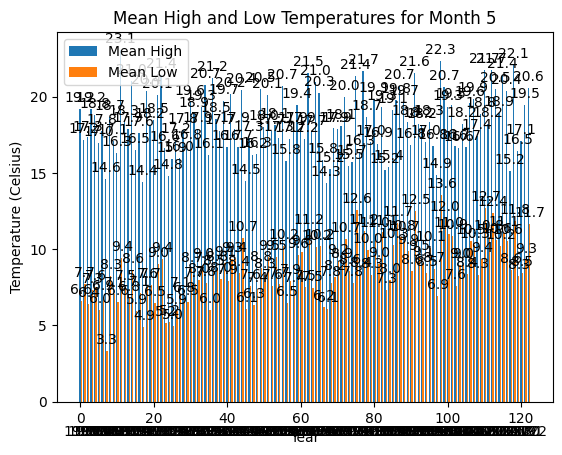

In [51]:
graphWeatherByMonthForEachYear(mainFrame, 5)

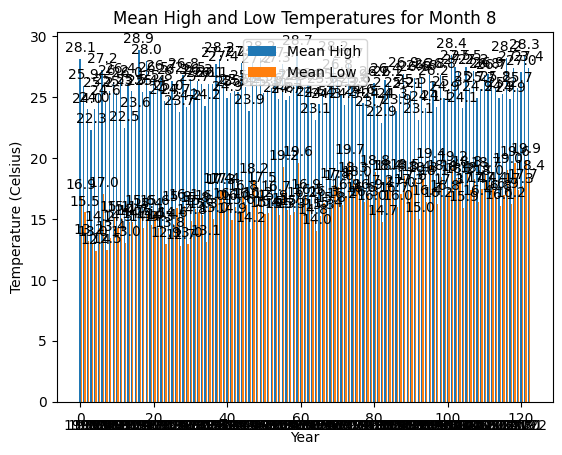

In [52]:
graphWeatherByMonthForEachYear(mainFrame, 8)

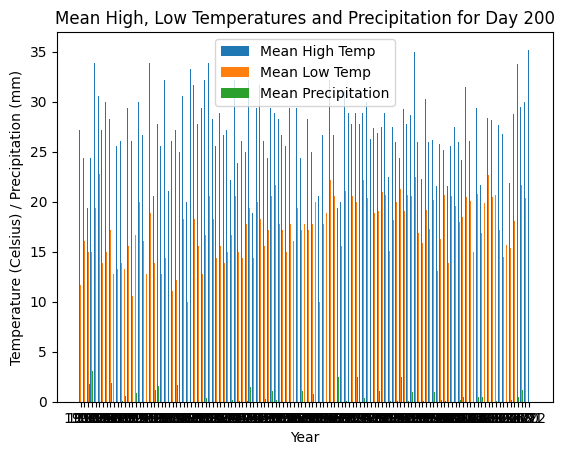

In [53]:
graphWeatherByDayForEachYear(mainFrame, 200)